In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
target_url = 'https://www.kickstarter.com/discover/advanced'
start_page = 1
end_page = 20
params = {
    'category_id': 16,
    'woe_id': '0',
    'sort' : 'popularity',
    'seed' : 2609642,
    'page' : start_page
}

In [4]:
resp = requests.get(target_url, params=params)
resp

<Response [200]>

In [5]:
resp.encoding

'utf-8'

In [6]:
resp.headers

{'Server': 'nginx', 'Content-Type': 'text/html; charset=utf-8', 'X-Frame-Options': 'SAMEORIGIN', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Heartbleed': 'NO; see http://heartbleedheader.com', 'ETag': 'W/"bc854c3cb122adc296e5387ed658686b"', 'Cache-Control': 'max-age=0, private, must-revalidate', 'Set-Cookie': 'vis=ed3f04c31f521594-8b78f598e1f57f5c-330cbe641e7fa60dv1; path=/; expires=Sun, 11 Sep 2039 03:42:32 -0000; secure, lang=en; path=/; secure, last_page=https%3A%2F%2Fwww.kickstarter.com%2Fdiscover%2Fadvanced%3Fcategory_id%3D16%26woe_id%3D0%26sort%3Dpopularity%26seed%3D2609642%26page%3D1; path=/; expires=Wed, 11 Sep 2019 03:12:32 -0000; HttpOnly; secure, _ksr_session=eTMrSHdNSVVCdXd5TFEreS9JdFVOZ1AyaEN0U283QU8ydEdSWmFhRGtrNzVRRUdOQ0JQcTJUTW9tVUNzT1ArYjIxekpFelJWVTkvWU9EeHpVSkVyRTJ3dk0zdXpYR1NIbnBmd3FFRUg2SFRUb0twN1RtNXdJeVdIaDhjWmRLNTdEUCtPTUtVR2x5TVVxSEYyNUtGenBRPT0tLU1XcUZLdUVFVHBmak5WNWl3alBVZEE9PQ%3D%3D--4d01786627fb58d1f82649f4ab5bee7ea554e044; pa

In [7]:
resp.url

'https://www.kickstarter.com/discover/advanced?category_id=16&woe_id=0&sort=popularity&seed=2609642&page=1'

In [8]:
soup = BeautifulSoup(resp.content)

In [10]:
page_list = soup.find('div', class_ = 'js-project-group')

In [11]:
title_list = page_list.find_all('div', class_ = 'js-react-proj-card grid-col-12 grid-col-6-sm grid-col-4-lg')

In [17]:
title_list[0]['data-project']

'{"id":1343899209,"photo":{"key":"assets/026/407/162/884d78f9926e559abbcf054684ac6084_original.jpg","full":"https://ksr-ugc.imgix.net/assets/026/407/162/884d78f9926e559abbcf054684ac6084_original.jpg?ixlib=rb-2.1.0&crop=faces&w=560&h=315&fit=crop&v=1567996770&auto=format&frame=1&q=92&s=88b4cfebdb645c12acb0d04798b5736b","ed":"https://ksr-ugc.imgix.net/assets/026/407/162/884d78f9926e559abbcf054684ac6084_original.jpg?ixlib=rb-2.1.0&crop=faces&w=352&h=198&fit=crop&v=1567996770&auto=format&frame=1&q=92&s=2f0bbf0fe99ffb5b2a571cb8c2612f7e","med":"https://ksr-ugc.imgix.net/assets/026/407/162/884d78f9926e559abbcf054684ac6084_original.jpg?ixlib=rb-2.1.0&crop=faces&w=272&h=153&fit=crop&v=1567996770&auto=format&frame=1&q=92&s=f5048f72f1ee568825cee7d64e93fbf2","little":"https://ksr-ugc.imgix.net/assets/026/407/162/884d78f9926e559abbcf054684ac6084_original.jpg?ixlib=rb-2.1.0&crop=faces&w=208&h=117&fit=crop&v=1567996770&auto=format&frame=1&q=92&s=4d75c846f7617cd03e5de7640bf9d600","small":"https://ksr-

In [18]:
datafile = []
start_page = 1
end_page = 20

datastr = ''


for i in range(start_page, end_page) : 
    target_url = 'https://www.kickstarter.com/discover/advanced'
    params = {
    'category_id': 16,
    'woe_id': '0',
    'sort' : 'popularity',
    'seed' : 2609642,
    'page' : i
    }
    resp = requests.get(target_url, params=params)
    page_list = soup.find('div', class_ = 'js-project-group')
    title_list = page_list.find_all('div', class_ = 'js-react-proj-card grid-col-12 grid-col-6-sm grid-col-4-lg')
    
    
    for title in title_list:
        item = json.loads(title['data-project'])
#         datafile.append(item['name'])
#         datafile.append(item['blurb'])
        
        datafile.append([item['name'], item['blurb'], item['category']['name']])
        datastr += item['name']
        datastr += item['blurb']
        datastr += item['category']['name']
#        another method
#        datafile.append({
#            'name': item['name'],
#            'blurb': item['blurb']
#        })
#        datafile.append((item['name'], item['blurb']))
    
#    for k in range(len(title_list)) : 
#        str_list = title_list[k]
#        item = json.loads(str_list['data-project'])
#        datafile.append(item['name'])
#        datafile.append(item['blurb'])
        

In [13]:
import json

In [14]:
item = json.loads(title_list[0]['data-project'])

In [15]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

C:\Users\elris\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [16]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [19]:
import nltk  
from nltk.corpus import stopwords  

In [20]:
dog_mask = np.array(Image.open('../Downloads/dog.png'))
stopwords = set(STOPWORDS)
stopwords.add("|")

In [21]:
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = 'C:\\Windows\\Fonts\\malgun.ttf'
# path = "c:/Windows/Fonts/10X10.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

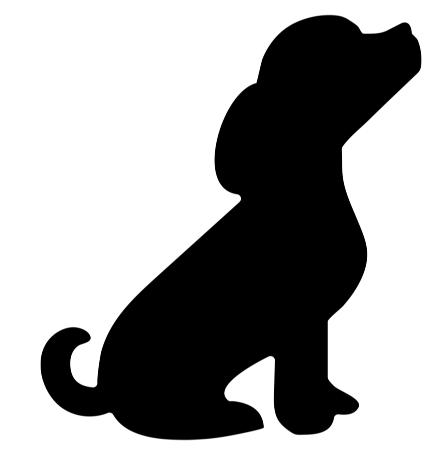

In [22]:
plt.figure(figsize = (8,8))
plt.imshow(dog_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
import re

In [24]:
import sys
flags = (re.UNICODE if sys.version < '3' and type(text) is unicode  # noqa: F821
                 else 0)

In [25]:
wc = WordCloud(font_path = 'path = "c:/Windows/Fonts/10X10.ttf', background_color = 'white', width = 800, height = 500, max_words = 3000, mask = dog_mask, collocations=False)
wc = wc.generate(datastr)
wc.words_

{'World': 1.0,
 'board': 1.0,
 're': 1.0,
 'water': 1.0,
 'flight': 1.0,
 'One': 1.0,
 'new': 1.0,
 'Smart': 0.6666666666666666,
 'Cutting': 0.6666666666666666,
 'Shower': 0.6666666666666666,
 'pressure': 0.6666666666666666,
 'Immersive': 0.6666666666666666,
 'audio': 0.6666666666666666,
 'Dual': 0.6666666666666666,
 'Driver': 0.6666666666666666,
 'TWS': 0.6666666666666666,
 'Advanced': 0.6666666666666666,
 'stereo': 0.6666666666666666,
 'Battery': 0.6666666666666666,
 'Design': 0.6666666666666666,
 'Compact': 0.6666666666666666,
 'Clean': 0.6666666666666666,
 'Q2': 0.6666666666666666,
 'size': 0.6666666666666666,
 'mobile': 0.6666666666666666,
 'phone': 0.6666666666666666,
 'created': 0.6666666666666666,
 'Standard': 0.6666666666666666,
 'auto': 0.6666666666666666,
 'Sonic': 0.6666666666666666,
 'Removal': 0.6666666666666666,
 'TinyCircuits': 0.6666666666666666,
 'Teeny': 0.6666666666666666,
 'Tiny': 0.6666666666666666,
 'First': 0.3333333333333333,
 'FeaturesThis': 0.3333333333333333

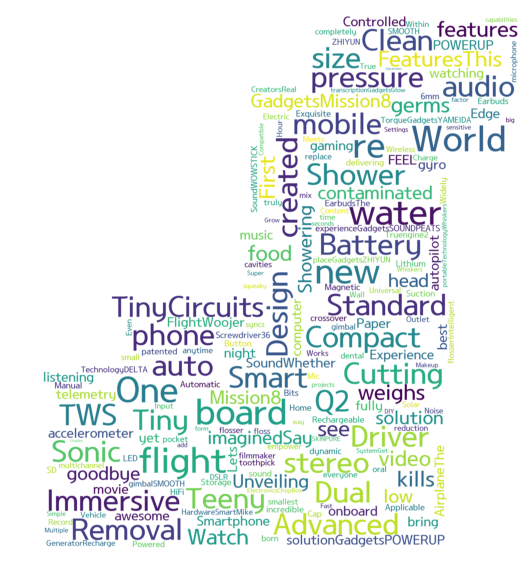

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()